In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv("sales.csv")
dataset.head()

,tv,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
X=dataset[['tv','radio','newspaper']]
y=dataset['sales']

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=100)
y_train

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
       ... 
87     16.0
103    19.7
67     13.4
24      9.7
8       4.8
Name: sales, Length: 140, dtype: float64

In [5]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [6]:
#intercept and coefficient
intercept = regressor.intercept_
coefficent = list(zip(X,regressor.coef_))
print("Intercept: ",intercept)
print("Coefficent: ",coefficent)

Intercept:  4.334595861728433
Coefficent:  [('tv', 0.053829108667250054), ('radio', 0.11001224388558062), ('newspaper', 0.0062899501461303525)]


In [7]:
y_pred = regressor.predict(X_test)
print("Prediction for test set:\n {}".format(y_pred))

Prediction for test set:
 [ 9.35221067 20.96344625 16.48851064 20.10971005 21.67148354 16.16054424
 13.5618056  15.39338129 20.81980757 21.00537077 12.29451311 20.70848608
  8.17367308 16.82471534 10.48954832  9.99530649 16.34698901 14.5758119
 17.23065133 12.56890735 18.55715915 12.12402775 20.43312609 17.78017811
 16.73623408 21.60387629 20.13532087 10.82559967 19.12782848 14.84537816
 13.13597397  9.07757918 12.07834143 16.62824427  8.41792841 14.0456697
  9.92050209 14.26101605 16.76262961 17.17185467 18.88797595 15.50165469
 15.78688377 16.86266686 13.03405813 10.47673934 10.6141644  20.85264977
 10.1517568   6.88471443 17.88702583 18.16013938 12.55907083 16.28189561
 18.98024679 11.33714913  5.91026916 10.06159509 17.62383031 13.19628335]


In [8]:
#Actual value and predicted value
regressor_diff = pd.DataFrame({'Actual value':y_test,'Predicted Value':y_pred})
regressor_diff

,Actual value,Predicted Value
126,6.6,9.352211
104,20.7,20.963446
99,17.2,16.488511
92,19.4,20.109710
111,21.8,21.671484
167,17.2,16.160544
116,12.2,13.561806
96,16.7,15.393381
52,22.6,20.819808
69,22.3,21.005371


In [9]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 3)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 3)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 3)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 3)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 3))
print("Rsquared: {:.2f}".format(regressor.score(X,y)*100))
print("Root mean squared error=",np.sqrt(round(sm.mean_squared_error(y_test, y_pred), 3)))

Mean absolute error = 1.228
Mean squared error = 2.636
Median absolute error = 0.945
Explain variance score = 0.875
R2 score = 0.866
Rsquared: 90.11
Root mean squared error= 1.6235762994081924


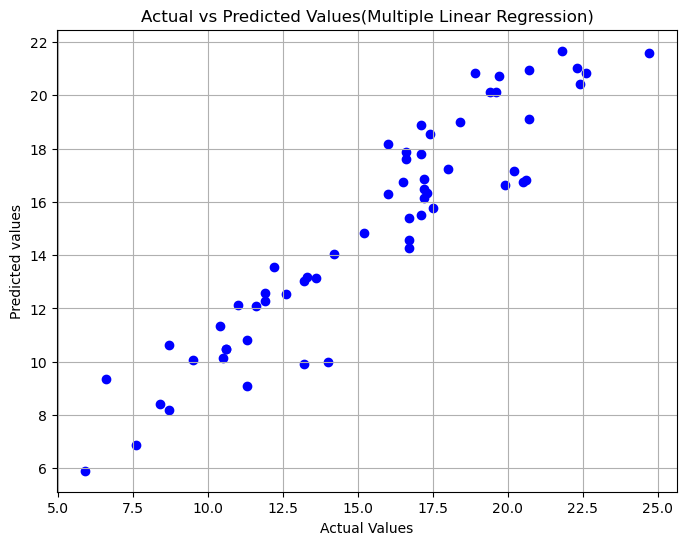

In [14]:
# Plotting actual vs predicted  values
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred,color='blue')
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")
plt.title("Actual vs Predicted Values(Multiple Linear Regression)")
plt.grid(True)
plt.show()